In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from tqdm import tqdm

In [2]:
# Parameters of the Axelrod model
grid_size = 50  # size of the grid
F = 3  # number of features
q = 10  # number of traits per feature

# Parameter for the noise
noise = 0.01  # probability of random cultural drift

# Parameter for the mass media influence
media = 0.01  # probability of adopting the global culture

In [3]:
# Initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

In [4]:
def simulation_step():
    # Randomly select an agent
    x, y = np.random.randint(grid_size, size=2)

    # Randomly select a neighbor
    dx, dy = np.random.choice([-1, 0, 1], size=2)
    nx, ny = (x + dx) % grid_size, (y + dy) % grid_size  # periodic boundary conditions

    # If they share at least one cultural feature
    if any(culture_grid[x, y, :] == culture_grid[nx, ny, :]):
        # The agent adopts one differing feature from the neighbor
        differing_features = np.where(culture_grid[x, y, :] != culture_grid[nx, ny, :])[0]
        if len(differing_features) > 0:
            f = np.random.choice(differing_features)
            culture_grid[x, y, f] = culture_grid[nx, ny, f]

def simulation_step_with_noise():
    # Perform a normal simulation step
    simulation_step()

    # With a small probability, an agent randomly changes one of its features
    if np.random.rand() < noise:
        x, y = np.random.randint(grid_size, size=2)
        f = np.random.randint(F)
        culture_grid[x, y, f] = np.random.randint(q)

def calculate_global_culture(culture_grid):
    L, _, F = culture_grid.shape
    culture_int = np.sum(culture_grid * (q ** np.arange(F)), axis=2)
    unique_vals, counts = np.unique(culture_int, return_counts=True)
    most_common_culture_int = unique_vals[np.argmax(counts)]
    most_common_culture = np.zeros(F)
    for i in range(F-1, -1, -1):
        most_common_culture[i] = most_common_culture_int % q
        most_common_culture_int //= q
    return most_common_culture

# The global culture
global_culture = calculate_global_culture(culture_grid)

def simulation_step_with_noise_and_media():
    # Perform a simulation step with noise
    simulation_step_with_noise()

    # With a small probability, an agent adopts the global culture
    if np.random.rand() < media:
        x, y = np.random.randint(grid_size, size=2)
        culture_grid[x, y, :] = global_culture

def calculate_Smax_norm():
    L, _, F = culture_grid.shape
    culture_int = np.sum(culture_grid * (q ** np.arange(F)), axis=2)
    unique_vals, counts = np.unique(culture_int, return_counts=True)
    max_count = np.max(counts)
    Smax_norm = max_count / (L ** 2)
    return Smax_norm

Running simulation:  29%|██▉       | 17464029/60000000 [37:36<1:31:35, 7739.49it/s] 


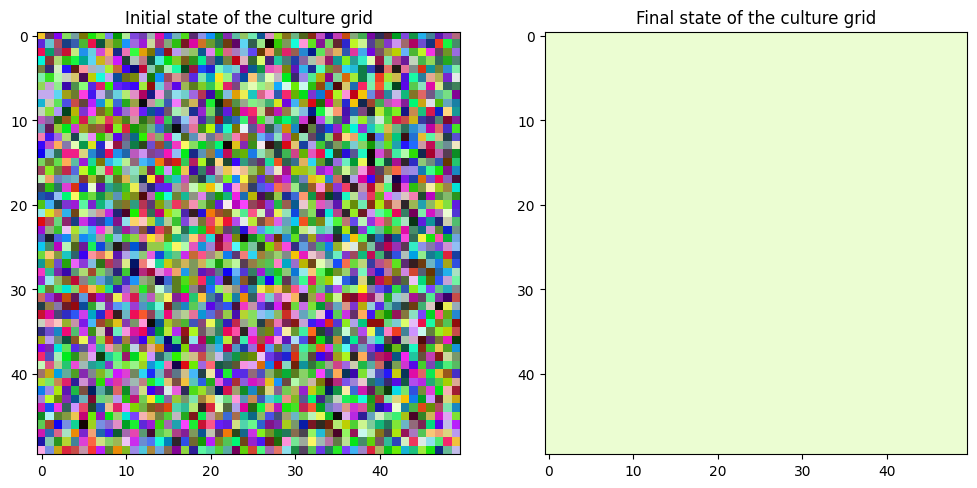

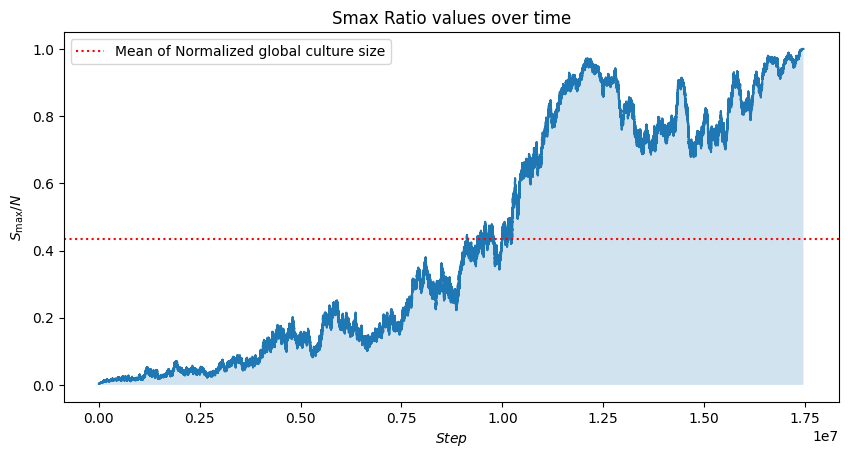

In [5]:
# Initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Generate a random colormap
cmap = colors.ListedColormap(np.random.rand(q**F, 3))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the initial state of the culture grid
axs[0].imshow(culture_integers, cmap=cmap)
axs[0].set_title('Initial state of the culture grid')

smax_values = []

# Run the simulation until culture_grid doesn't change for 10 consecutive cycles
previous_culture_grid = np.copy(culture_grid)
consecutive_cycles = 0
max_consecutive_cycles = 40000
for step in tqdm(range(60000000), desc="Running simulation"):
    simulation_step()
    smax = calculate_Smax_norm()
    smax_values.append(smax)

    # Check if culture_grid has changed from the previous state
    if np.array_equal(culture_grid, previous_culture_grid):
        consecutive_cycles += 1
    else:
        consecutive_cycles = 0
    if consecutive_cycles >= max_consecutive_cycles:
        break
    previous_culture_grid = np.copy(culture_grid)

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Visualize the final state of the culture grid
axs[1].imshow(culture_integers, cmap=cmap)
axs[1].set_title('Final state of the culture grid')

# Calculate the mean
mean_size = np.mean(smax_values)

# Plot the normalized size of the global culture over time
plt.figure(figsize=(10, 4.8))
plt.plot(smax_values)
plt.axhline(y=mean_size, linestyle='dotted', color='r', label='Mean of Normalized global culture size')
plt.fill_between(range(len(smax_values)), smax_values, alpha=0.2)
plt.xlabel('$Step$')
plt.ylabel('$S_{\mathrm{max}}/N$')
plt.title('Smax Ratio values over time')
plt.legend()

# Display the figure
plt.show()

Running simulation: 100%|██████████| 60000000/60000000 [3:16:56<00:00, 5077.47it/s]  


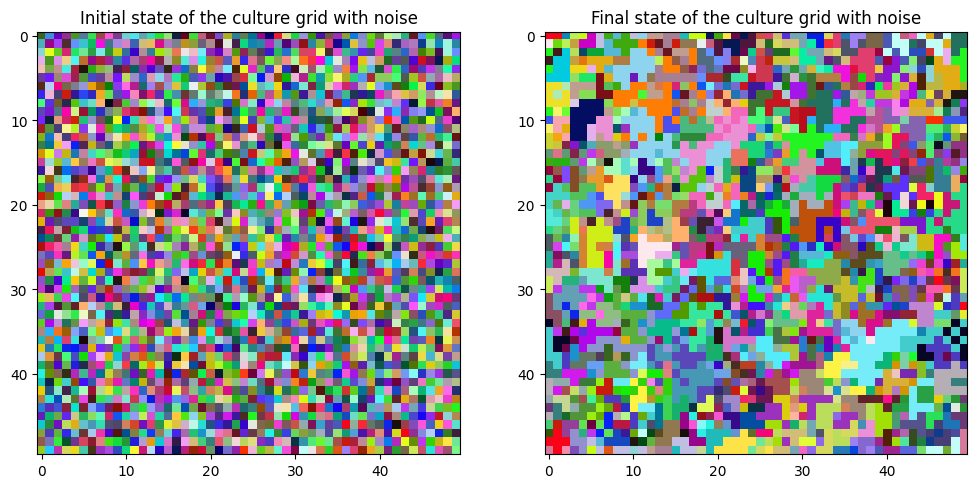

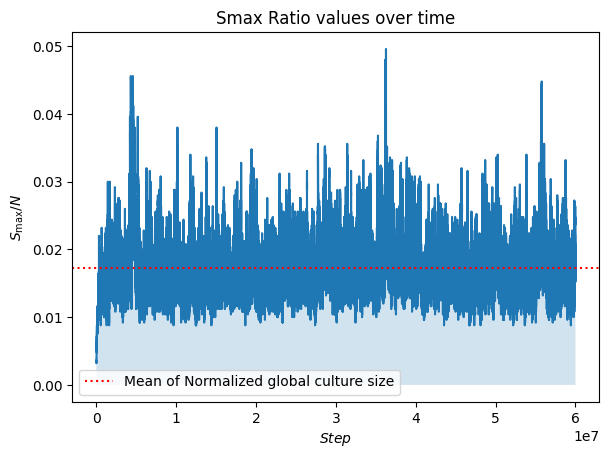

In [5]:
# Re-initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Generate a random colormap
cmap = colors.ListedColormap(np.random.rand(q**F, 3))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the initial state of the culture grid
axs[0].imshow(culture_integers, cmap=cmap)
axs[0].set_title('Initial state of the culture grid with noise')

smax_values = []

# Run the simulation until culture_grid doesn't change for 10 consecutive cycles
previous_culture_grid = np.copy(culture_grid)
consecutive_cycles = 0
max_consecutive_cycles = 40000
for step in tqdm(range(60000000), desc="Running simulation"):
    simulation_step_with_noise()
    smax = calculate_Smax_norm()
    smax_values.append(smax)

    # Check if culture_grid has changed from the previous state
    if np.array_equal(culture_grid, previous_culture_grid):
        consecutive_cycles += 1
    else:
        consecutive_cycles = 0
    if consecutive_cycles >= max_consecutive_cycles:
        break
    previous_culture_grid = np.copy(culture_grid)

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Visualize the final state of the culture grid
axs[1].imshow(culture_integers, cmap=cmap)
axs[1].set_title('Final state of the culture grid with noise')

# Calculate the mean
mean_size = np.mean(smax_values)

# Plot the normalized size of the global culture over time
plt.figure(figsize=(6.8, 4.8))
plt.plot(smax_values)
plt.axhline(y=mean_size, linestyle='dotted', color='r', label='Mean of Normalized global culture size')
plt.fill_between(range(len(smax_values)), smax_values, alpha=0.2)
plt.xlabel('$Step$')
plt.ylabel('$S_{\mathrm{max}}/N$')
plt.title('Smax Ratio values over time')
plt.legend()

# Display the figure
plt.show()

Running simulation: 100%|██████████| 60000000/60000000 [3:34:04<00:00, 4671.38it/s]  


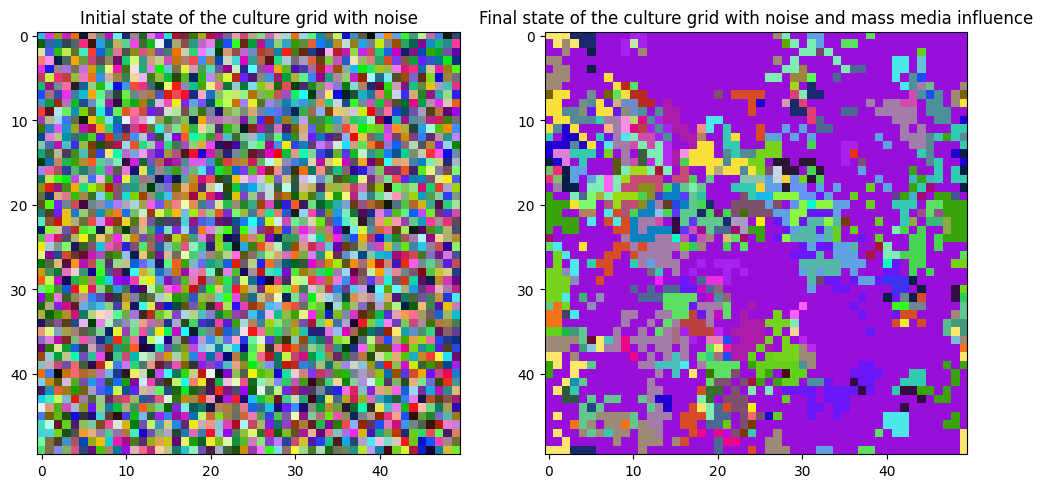

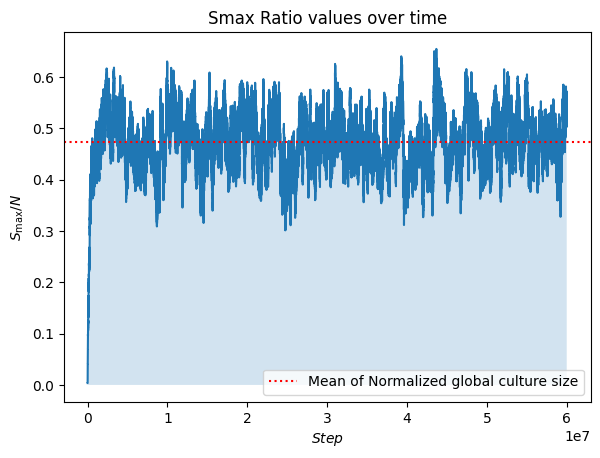

In [6]:
# Re-initialize the culture grid
culture_grid = np.random.randint(q, size=(grid_size, grid_size, F))

# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Generate a random colormap
cmap = colors.ListedColormap(np.random.rand(q**F, 3))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Visualize the initial state of the culture grid
axs[0].imshow(culture_integers, cmap=cmap)
axs[0].set_title('Initial state of the culture grid with noise')

smax_values = []

# Run the simulation until culture_grid doesn't change for 10 consecutive cycles
previous_culture_grid = np.copy(culture_grid)
consecutive_cycles = 0
max_consecutive_cycles = 40000
for step in tqdm(range(60000000), desc="Running simulation"):
    simulation_step_with_noise_and_media()
    smax = calculate_Smax_norm()
    smax_values.append(smax)

    # Check if culture_grid has changed from the previous state
    if np.array_equal(culture_grid, previous_culture_grid):
        consecutive_cycles += 1
    else:
        consecutive_cycles = 0
    if consecutive_cycles >= max_consecutive_cycles:
        break
    previous_culture_grid = np.copy(culture_grid)


# Compute a unique integer for each possible culture
culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

# Visualize the final state of the culture grid
axs[1].imshow(culture_integers, cmap=cmap)
axs[1].set_title('Final state of the culture grid with noise and mass media influence')

# Calculate the mean
mean_size = np.mean(smax_values)

# Plot the normalized size of the global culture over time
plt.figure(figsize=(6.8, 4.8))
plt.plot(smax_values)
plt.axhline(y=mean_size, linestyle='dotted', color='r', label='Mean of Normalized global culture size')
plt.fill_between(range(len(smax_values)), smax_values, alpha=0.2)
plt.xlabel('$Step$')
plt.ylabel('$S_{\mathrm{max}}/N$')
plt.title('Smax Ratio values over time')
plt.legend()

# Display the figure
plt.show()